# How To Export a Model Trained in Supervisely

After you have trained a model using Supervisely application, you can download its weights and config file, and use the model outside Supervisely Platform.

## 1. Download model weights and config from Team Files

**1. Go to Team Files:**

![Team Files](https://github.com/supervisely-ecosystem/mmsegmentation/assets/31512713/678fbf96-e16c-449d-9e5d-1ae4efc8a796)

**2. Download model weights and config file:**

![Download model](https://github.com/supervisely-ecosystem/train-mmdetection-v3/assets/31512713/63cab9dd-e6d1-4b72-a61a-bad946c4904a)

**Alternatively, you can download these files using Supervisely API:**

In [ ]:
# Install supervisely SDK if not installed
!pip install supervisely

In [ ]:
# Fill in these arguments:
server_address = "https://..."
api_token = "abcd0123456789..."
team_id = ...
path_to_weights_in_team_files = ...
path_to_config_in_team_files = ...
download_dir = "./my_model"

import supervisely as sly
api = sly.Api(server_address, api_token)
api.file.download(team_id, path_to_weights_in_team_files, f"{download_dir}/weights.pth")
api.file.download(team_id, path_to_config_in_team_files, f"{download_dir}/config.py")

## 2. Install requirements

**You can use our pre-builded docker image:**

`supervisely/mmdet-3.0:1.0.0`

Or build the image with this [Dockerfile](https://github.com/supervisely-ecosystem/serve-mmdetection-v3/blob/master/docker/mmdet-3.0.Dockerfile).

**Alternatively, you can install only needed requirements with pip:**

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2
!pip install openmim==0.3.7
!mim install mmengine==0.7.4 mmcv==2.0.0 mmdet==3.0.0 "mmcls>=1.0.0rc0"

## 3. Build the model

After you've installed requirements and downloaded model weights and config, **fill in the paths** where the files located:

In [3]:
# Put your paths here:
weights_path = "my_model/weights.pth"
config_path = "my_model/config.py"

device = "cuda:0"

In [29]:
import mmcv
from mmengine import Config
from mmdet.apis import inference_detector, init_detector

# build the model
cfg = Config.fromfile(config_path)
model = init_detector(cfg, weights_path, device=device, palette='random')

Loads checkpoint by local backend from path: my_model/weights.pth


## 4. Inference

In [30]:
image_path = "demo_data/image_02.jpg"
result = inference_detector(model, image_path)
print(result)

<DetDataSample(

    META INFORMATION
    img_path: 'demo_data/image_02.jpg'
    ori_shape: (952, 1200)
    scale_factor: (0.42, 0.42016806722689076)
    batch_input_shape: (416, 512)
    pad_shape: (416, 512)
    img_id: 0
    img_shape: (400, 504)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=952, width=1200)
            labels: tensor([], device='cuda:0', dtype=torch.int64)
        ) at 0x7f49c250f9d0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([6.3951e-04, 8.0638e-03, 8.8608e-04, 4.3421e-03, 9.6744e-01, 1.5828e-03,
                        4.1796e-04, 3.7663e-04, 3.6715e-04, 3.0268e-04, 9.3024e-04, 7.1599e-04,
                        9.8631e-01, 3.7519e-04, 1.4086e-03, 3.1083e-04, 4.4329e-04, 4.4048e-04,
      

## 5. Visualize

In [38]:
from mmdet.registry import VISUALIZERS
from mmdet.visualization.local_visualizer import DetLocalVisualizer

# This code is needed for saving the image on disk:
cfg.vis_backends[0]["save_dir"] = "vis"
model.cfg.visualizer["save_dir"] = "vis"

# create visualizer
visualizer: DetLocalVisualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

/root/train-mmdetection-v3/.venv/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


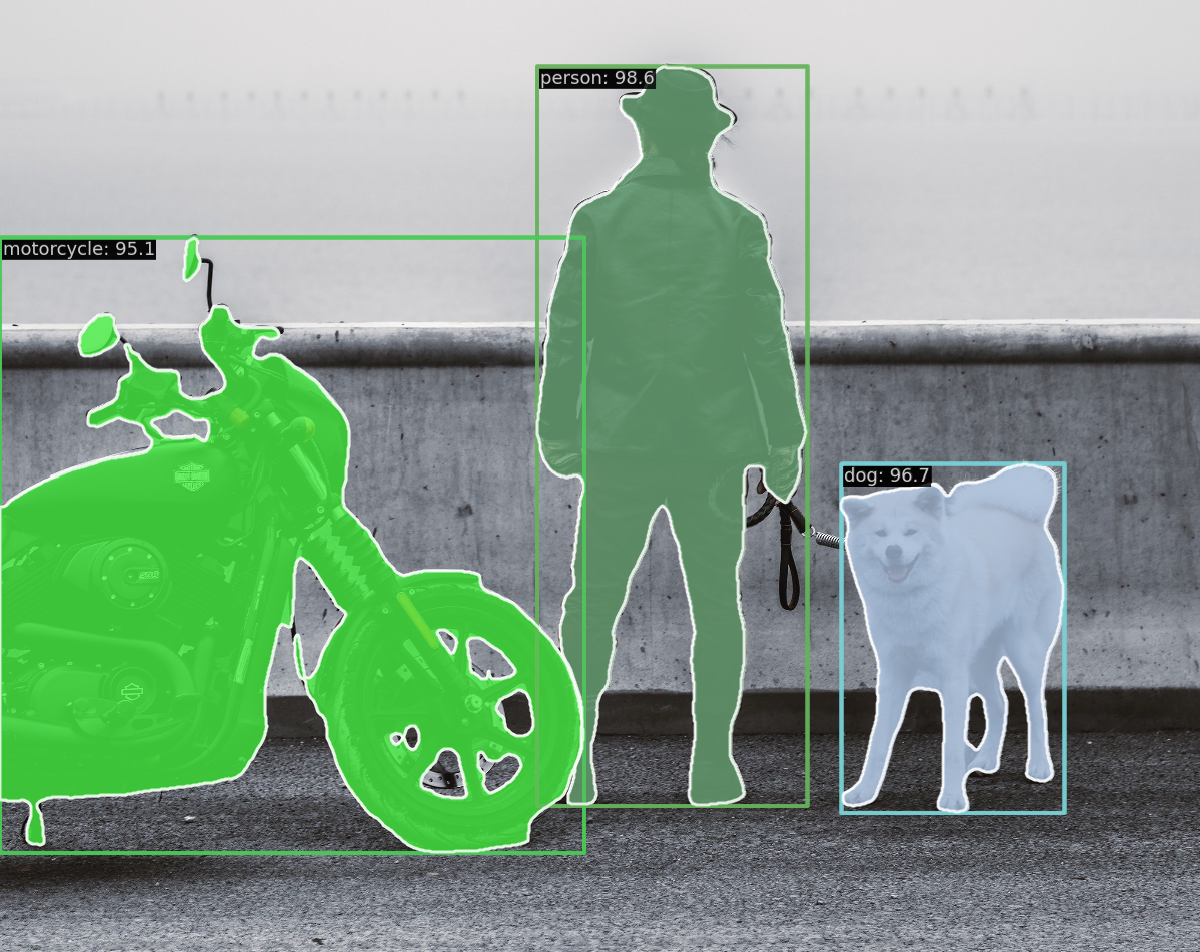

In [41]:
img = mmcv.imread(image_path, channel_order="rgb")
visualizer.add_datasample(
    "result",
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
    show=False,
)
res_img = visualizer.get_image()

from PIL import Image
Image.fromarray(res_img)